<a href="https://colab.research.google.com/github/antondremak91/data_cost/blob/main/data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data_cost = pd.read_excel('/content/drive/MyDrive/codingDojo/data_science/week_4/Cost of 1GB of Data.xlsx')
data_cost

,Rank,Country,Avg Price of 1GB (USD)
0,1,India,0.09
1,2,Israel,0.11
2,3,Kyrgyzstan,0.21
3,4,Italy,0.43
4,5,Ukraine,0.46
...,...,...,...
150,151,Botswana,13.87
151,152,Yemen,15.98
152,153,Chad,23.33
153,154,Benin,27.22


Here we got a dataframe with average cost of data in different countries in the world. Lets get some information about our data.

In [39]:
data_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    155 non-null    int64  
 1   Country                 155 non-null    object 
 2   Avg Price of 1GB (USD)  155 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


Lets check for missing values.

In [40]:
data_cost.isna().sum()

Rank                      0
Country                   0
Avg Price of 1GB (USD)    0
dtype: int64

Looks like we got pretty clean dataframe. Lets use the rank as an index.

In [41]:
data_cost.set_index('Rank', inplace=True)

Lets get some statistics.

In [42]:
data_cost.describe()

,Avg Price of 1GB (USD)
count,155.000000
mean,3.748452
std,4.500110
min,0.090000
25%,1.050000
50%,2.220000
75%,4.540000
max,27.410000


Lets make a boxplot to view the statistical summaries.

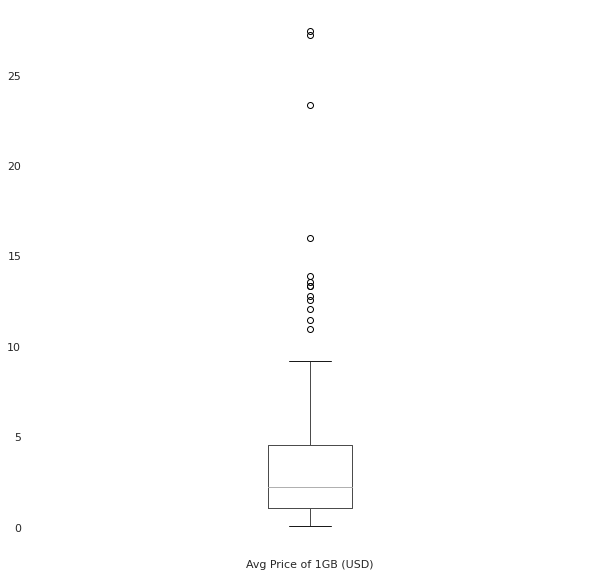

In [52]:
data_cost.boxplot(column=['Avg Price of 1GB (USD)'],figsize= (10,10));

On our boxplot we can see that most of the values are on the lower side.

We can create a barplot to see the big picture.

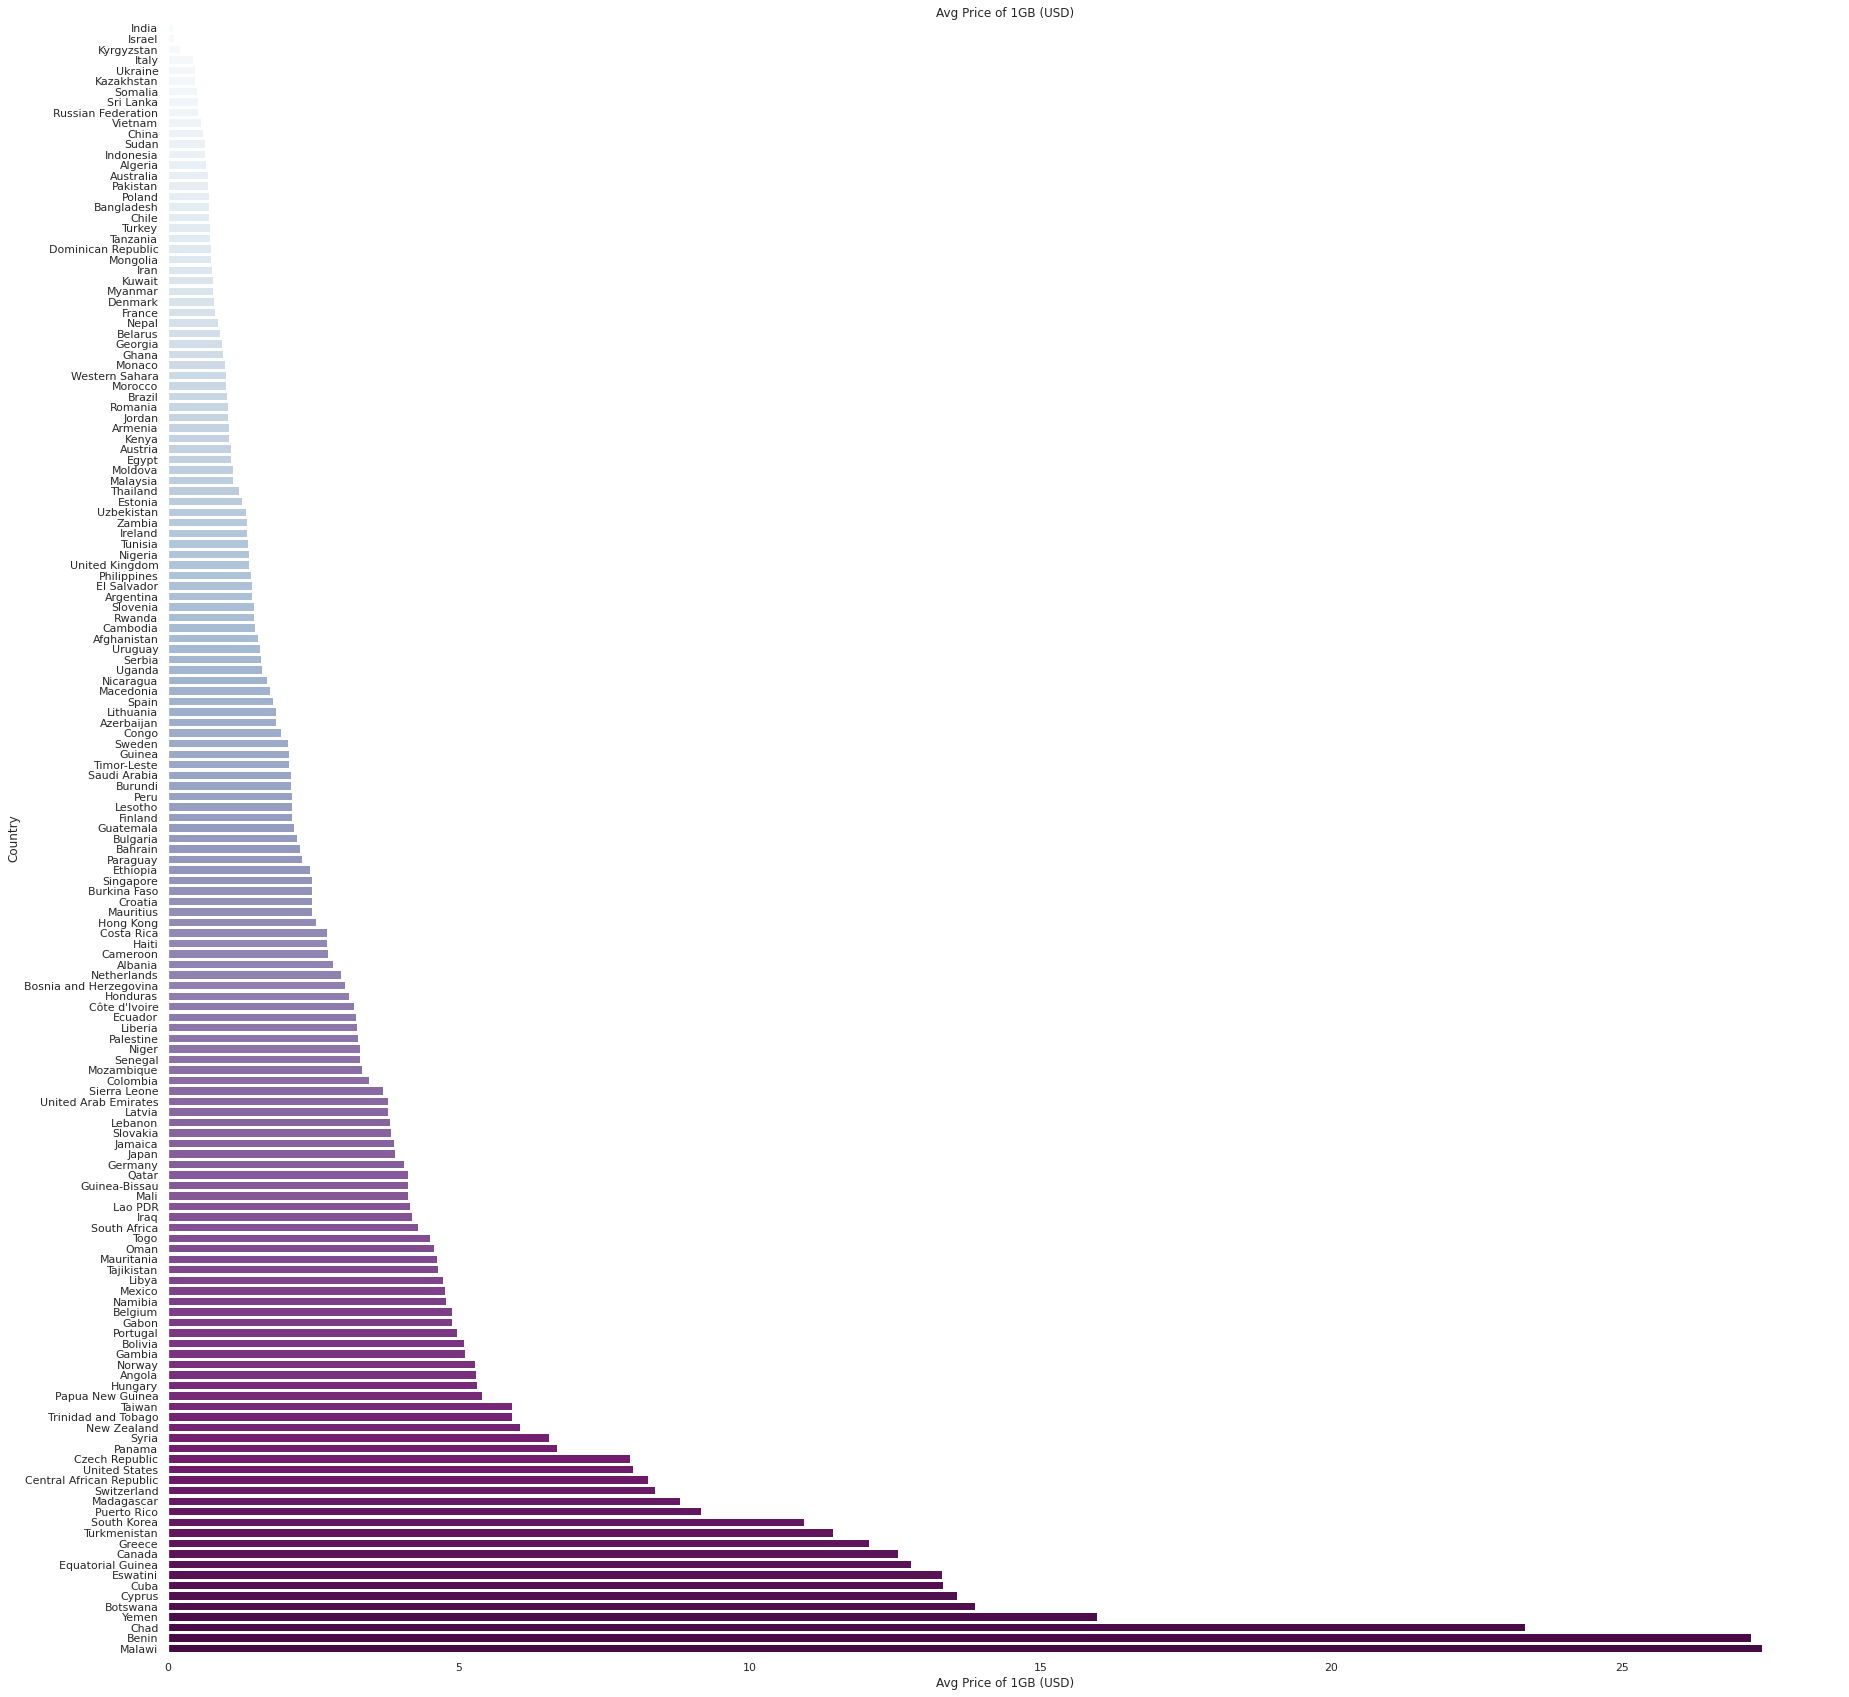

In [44]:
sns.set(rc={'figure.figsize':(30,30), 'axes.facecolor':'white', 'figure.facecolor':'white',})
sns.barplot(x = data_cost['Avg Price of 1GB (USD)'], 
            y = data_cost['Country'],
            order=data_cost.sort_values('Avg Price of 1GB (USD)',ascending = True).Country,
            palette="BuPu")
plt.title('Avg Price of 1GB (USD)');
plt.show()

Great. Now lets separate the countries with the cheapest and most expensive data.

In [45]:
cheapest = data_cost.sort_values(by = 'Avg Price of 1GB (USD)').head(10)
cheapest

,Country,Avg Price of 1GB (USD)
Rank,,
1,India,0.09
2,Israel,0.11
3,Kyrgyzstan,0.21
4,Italy,0.43
5,Ukraine,0.46
6,Kazakhstan,0.46
7,Somalia,0.50
8,Sri Lanka,0.51
9,Russian Federation,0.52


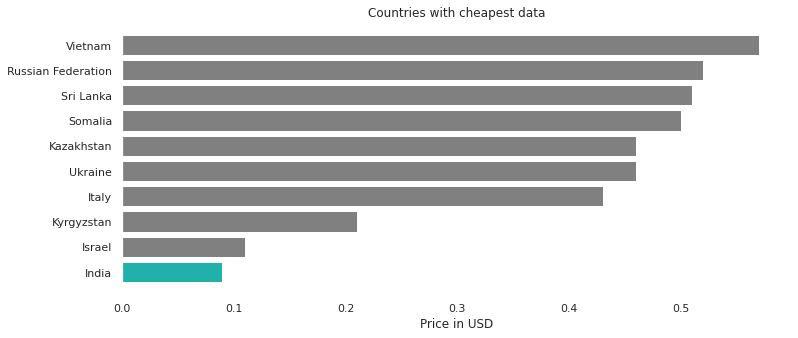

In [46]:
plt.figure(figsize = (12, 5))

plt.barh(cheapest['Country'], cheapest['Avg Price of 1GB (USD)'],
         color = ['lightseagreen', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey','grey'])

plt.xlabel('Price in USD')
plt.title('Countries with cheapest data');

We can see that India has the cheapest average cost per 1 Gb of data in USD.

In [47]:
most_expencive = data_cost.sort_values(by = 'Avg Price of 1GB (USD)').tail(10)
most_expencive

,Country,Avg Price of 1GB (USD)
Rank,,
146,Canada,12.55
147,Equatorial Guinea,12.78
148,Eswatini,13.31
149,Cuba,13.33
150,Cyprus,13.56
151,Botswana,13.87
152,Yemen,15.98
153,Chad,23.33
154,Benin,27.22


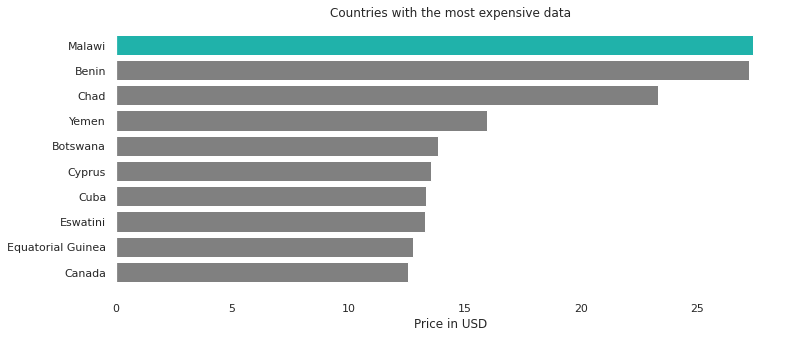

In [48]:
plt.figure(figsize = (12, 5))

plt.barh(most_expencive['Country'], most_expencive['Avg Price of 1GB (USD)'],
         color = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey','grey','lightseagreen'])

plt.xlabel('Price in USD')
plt.title('Countries with the most expensive data');

And Malawi has the most expensive data per 1 Gb in USD.